In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [55]:
EXP_DIR = "../output/dimRegime-gb-setting-2"
output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
cols = [col for col in output_df.columns if col.startswith('mle')]

Process file: ../output/dimRegime-gb-setting-2/1590953832-g04-d50-n500000/output-03.json...


In [56]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(200, 25)


,vi_as_po,vi_ar_po,vi_bs_po,vi_br_po,vi_conv,vi_history,vi_adj_mean,vi_adj_mode,gb_baseline,gb_beta,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[[317.82869657440693, 1120.6014358959574, 1124...","[[36024.77734375, 36030.7890625, 36017.0898437...","[[23.71859206098263, 159.39365931547977, 281.2...","[[25.5562685266375, 200.79896999518726, 341.49...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.009627458339653092, 0.15571151975096156, 0...","[[0.009474778968989565, 0.15551844726662778, 0...","[0.038213935175799, 0.04611805729405588, 0.061...","[2.393371911214989, 2.156890815364304, 1.55315...",...,output-00.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-00.json
1,"[[631.56554757411, 876.4904451300749, 1316.651...","[[36762.0546875, 36760.40625, 36755.21875, 367...","[[9.964881833264828, 182.85177708002405, 250.2...","[[10.003356095491469, 267.397219753294, 382.16...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.5422159793637187e-05, 0.17788214636285032,...","[[-0.0, 0.1776814587594192, 0.2484511127336875...","[0.035811406724840886, 0.0462823440173538, 0.0...","[2.439177212728035, 2.0923143216625784, 1.6507...",...,output-01.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-01.json
2,"[[515.1114471149472, 987.3363919010609, 1465.9...","[[36643.8671875, 36650.609375, 36653.6875, 366...","[[9.964715939870715, 146.27150227118074, 225.9...","[[10.006289455341552, 171.4827509689145, 271.6...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.4882537526356529e-05, 0.1445299799736625, ...","[[-0.0, 0.14434105562979455, 0.224453606087008...","[0.03588576902760973, 0.0444154401392726, 0.05...","[2.4763154326802788, 2.075069972857667, 1.6468...",...,output-02.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-02.json
3,"[[639.9810767858422, 955.0188363218642, 1238.1...","[[36232.0625, 36223.71875, 36215.90625, 36240....","[[9.965126380890037, 172.73806505102354, 290.2...","[[10.006395881187265, 254.39917426406998, 456....",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.517840226196874e-05, 0.1681477139000803, 0...","[[-0.0, 0.16794181232673094, 0.291161807362889...","[0.03519964928522691, 0.04476179221430195, 0.0...","[2.4073829446189796, 2.1600343164485323, 1.645...",...,output-03.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-03.json
4,"[[2176.744999034283, 1133.5822923541443, 748.0...","[[34906.18359375, 34906.33203125, 34903.015625...","[[1776.5810873844707, 908.4082482586882, 108.0...","[[1912.200498989322, 1365.4981176343722, 111.7...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.4104304251105678, 0.20596247605757942, 0.0...","[[0.4103518970032121, 0.205870674100053, 0.019...","[0.1702335554397003, 0.1528981869531242, 0.075...","[0.5776856849645305, 0.6146891834417362, 1.176...",...,output-00.json,5,"[0.049, 0.0262, 0.0384, 0.0113, 0.0364]","[[0.0813, 0.6992, 0.9994, 0.855, 0.0579], [0.4...","[[0.4291507633587786, 0.24403625954198474, 0.0...",5,50000,"[1932551514, 1387882336, 1179797097, 223088044]",1409237375,1590953815-g01-d05-n050000/output-00.json


---

In [57]:
suf_col_dict = {
    #'mle': 'mle_adjacency', 
    
    #'bbvi': 'bbvi_adj_mean', 
    #'bbvi': 'bbvi_adj_mode',
    
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_vi                                        acc_gb                                      ... fn_vi                             fn_gb                              
          min       max      mean       std count       min       max      mean       std count  ...   min max   mean        std count   min  max    mean        std count
dim                                                                                              ...                                                                      
5    1.000000  1.000000  1.000000  0.000000    20  0.800000  0.920000  0.876000  0.040833    20  ...     0   0   0.00   0.000000    20     0    3    0.70   0.864505    20
10   0.980000  1.000000  0.996000  0.007539    20  0.790000  0.910000  0.852000  0.028580    20  ...     0   2   0.35   0.745160    20     3   10    7.40   1.818038    20
15   0.977778  1.000000  0.993556  0.005093    20  0.822222  0.897778  0.864667  0.020263    20  ...     0   5   1.25   1.208522    20    13   26   19.75   3.354102    20
20   0.965000  1.000000  0.990875  0.008401    20  0.857500  0.902500  0.878125  0.012484    20  ...     0  14   3.50   3.300718    20    24   44   32.35   6.409491    20
25   0.982400  1.000000  0.990800  0.004610    20  0.857600  0.913600  0.882480  0.015333    20  ...     0  11   5.15   2.870448    20    37   63   49.90   7.376349    20
30   0.970000  0.998889  0.986611  0.006573    20  0.864444  0.911111  0.885222  0.013789    20  ...     1  23  11.10   5.495453    20    47   90   73.00  12.636622    20
35   0.973878  0.992653  0.984776  0.005822    20  0.874286  0.912653  0.895878  0.011418    20  ...     7  31  17.60   6.969105    20    76  109   90.80  10.395343    20
40   0.979375  0.994375  0.987781  0.003866    20  0.893125  0.915625  0.903438  0.007145    20  ...     8  31  18.70   5.795643    20    95  127  110.95  10.674490    20
45   0.971852  0.992099  0.983012  0.006239    20  0.877037  0.916543  0.895877  0.013078    20  ...    14  55  32.60  12.419848    20   122  192  153.35  22.342490    20
50   0.970000  0.984400  0.979540  0.004160    20  0.884400  0.906000  0.896940  0.006541    20  ...    38  73  49.80  10.303806    20   169  215  189.65  13.997274    20

[10 rows x 140 columns]

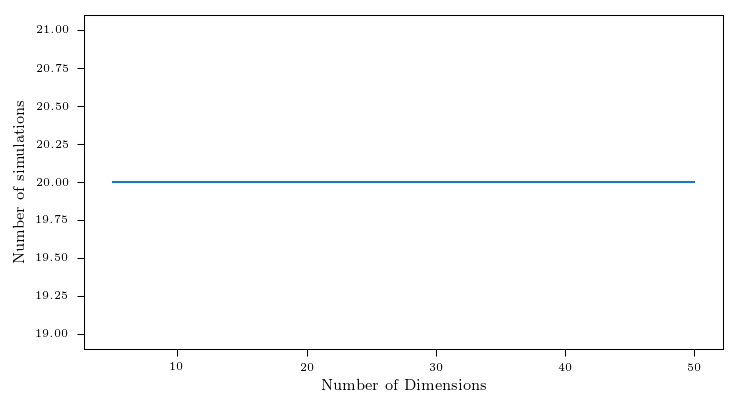

In [58]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_vi']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

In [59]:
NEURIPS_RCPARAMS = {
    "figure.autolayout": False,         # Makes sure nothing the feature is neat & tight.
    "figure.figsize": (5.5, 2.95),      # Text width: 5.5in (double figure minus spacing 0.2in).
    "figure.dpi": 150,                  # Displays figures nicely in notebooks.
    "axes.linewidth": 0.5,              # Matplotlib's current default is 0.8.
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",             # use serif rather than sans-serif
    "font.serif": "Times New Roman",    # use "Times New Roman" as the standard font
    "font.size": 7,
    "axes.titlesize": 7,                # LaTeX default is 10pt font.
    "axes.labelsize": 7,                # LaTeX default is 10pt font.
    "legend.fontsize": 6,               # Make the legend/label fonts a little smaller
    "legend.frameon": True,             # Remove the black frame around the legend
    "patch.linewidth": 0.5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "grid.linewidth": 0.3,
    "pgf.texsystem": "xelatex",         # use Xelatex which is TTF font aware
    "pgf.rcfonts": False,               # Use pgf.preamble, ignore standard Matplotlib RC
    "pgf.preamble": [
        r'\usepackage{fontspec}',
        r'\usepackage{unicode-math}',
        r'\setmainfont{Times New Roman}',
    ],
    'errorbar.capsize': 3.0,
}
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update(NEURIPS_RCPARAMS)

In [60]:
plot_meta_data = [
    ('f1score',  'F1-Score',         ), 
    ('relerr',   'Relative Error',   ),
    ('runtime_log',  'Runtime (in min)', ),
    ('runtime_lin',  'Runtime (in min)', ),
    
#    ('precAt5', 'Precision@5',     ),
    ('precAt10', 'Precision@10',     ),
#    ('precAt20', 'Precision@20',     ),
#    ('precAt50', 'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
]

#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
#    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
#    ('mle',  'MLE',   'C0', '-',  1.0), 
]

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(5.5/2 - 0.2, 1.25))
    plt.grid()
    
    if prefix == 'runtime_log':
        #ax = plt.gca()
        #new_ax = plt.twinx()
        #plt.sca(new_ax)
        #plt.grid(False)
        pass
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    if prefix == 'runtime_log':
        #plt.yticks([], [])
        #plt.sca(ax)
        pass
    
    plt.xlabel(f'Number of Dimensions $M$', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    
    if prefix == 'f1score':
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.legend(loc='lower left', prop={'size': 7})
        plt.ylim(bottom=0)
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass
        
    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)

    plt.tight_layout()
    plt.subplots_adjust(left=0.20, right=0.99, top=0.97, bottom=0.24)
    plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}.pdf')
    plt.close()

f1score
relerr
runtime_log
runtime_lin
precAt10
